# 0. Import

In [4]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from notebooks.FIRAS import *
# sys.path.insert(1, '../')
# importing generic constants and functions
from notebooks.const_func_general import *
# importing distortion specific constants and functions
from notebooks.cons_func_distortion import *



from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from notebooks.pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

FileNotFoundError: [Errno 2] File b'data/FIRASData.csv' does not exist: b'data/FIRASData.csv'

# 1. Definitions of constants and functions

## 1A. Constants and Functions (General)

Hydrogen number density

\begin{equation}
n_\text{H} = (1-Y_p) n_b = (1-Y_p) \times \eta \frac{2 \zeta(3)}{\pi^2} T^3_\gamma,
\end{equation}

Proton number density (proton from both Hydrogen and Helium)

\begin{equation}
n_p = \left( 1 - \frac{Y_p}{2} \right) n_b = \left( 1 - \frac{Y_p}{2} \right) \times \eta \frac{2 \zeta(3)}{\pi^2} T^3. 
\end{equation}

In [4]:
# From Andrea       # H0      = 1.43654e-33 # in eV
# From Andrea       # Omega_m = 0.3165
# From Andrea       # Omega_r = 8e-5
# From Andrea       # ne0     = (1 - 0.25/2)*2.46e-7 # in cm^-3
# From Andrea       # TCMB_0  = 2.3482e-4    # in eV

# From Xucheng MMA  # TCMB_0  = 2.725*K    # in eV
# From Xucheng MMA  # Omega_m = 0.31684
# From Xucheng MMA  # eta = 6.16 * 10**(-10)


# Fundamental Constants
h = 4.135667696*1e-15          # in eV s

hbar = h / (2*np.pi)           # in eV s

c = 2.99792458*1e10            # in cm/s

mpl = 1.2209 * 10**19 * 10**9  # in eV

# Defined by Xucheng

# Consistent with my MMA
cm_to_m     = 10**(-2)
cm_to_km    = 10**(-5)

m_to_cm     = 1/cm_to_m
km_to_cm    = 1/cm_to_km

pc_to_cm    = 3.08567758149137* 10**18
Mpc_to_cm   = 10**6 * pc_to_cm

cmInv_to_eV = hbar*c
sInv_to_eV  = hbar
eV_to_J     = 1.602176634 * 10**(-19)
kB_to_JperK = 1.38064852 * 10**(-23)

eV_to_K = eV_to_J/kB_to_JperK

J = 1/eV_to_J  # in eV
K = 1/eV_to_K  # in eV

# Cosmological Constants

# Planck 2018 paper VI Table 2 Final column (68% confidence interval)
planck18_cosmology = {'Oc0': 0.2607,
                              'Ob0': 0.04897,
                              'Om0': 0.3111,
                              'Hubble0': 67.66,
                              'n': 0.9665,
                              'sigma8': 0.8102,
                              'tau': 0.0561,
                              'z_reion': 7.82,
                              't0': 13.787,
                              'Tcmb0': 2.7255,
                              'Neff': 3.046,
                              'm_nu': [0., 0., 0.06],
                              'z_recomb': 1089.80,
                              'reference': "Planck 2018 results. VI. Cosmological Parameters, "
                                           "A&A, submitted, Table 2 (TT, TE, EE + lowE + lensing + BAO)"
                              }


# TCMB_0 from Planck 2018
TCMB_0   = planck18_cosmology["Tcmb0"]*K # in eV


# H = h_Hubble * 100 km/s/Mpc
# Note: 'h' is already used for Planck constant before
h_Hubble = planck18_cosmology["Hubble0"]/100

H0       = h_Hubble * ( 100 * km_to_cm * sInv_to_eV/ Mpc_to_cm )   # in eV

# Faction of matter
Omega_m  = planck18_cosmology["Om0"]

# Fraction of radiation
Omega_r = (8*np.pi**3/90) * 3.38 * (TCMB_0**4/(mpl**2 * H0**2))

# Fraction of dark energy
Omega_Lambda = 1 - Omega_r - Omega_m

# Baryon-to-photon ratio, from 1912.01132
eta = 6.129 * 10**(-10)

# Helium-to-hydrogen mass fraction, from 1912.01132
Yp  = 0.247

# Electron mass (from PDG)
m_e = 0.511 * 10**6 # in eV

# From PDG
alpha = 1/137.035999084

ee = np.sqrt(4*np.pi*alpha)

# Thompson Scattering Cross Section (Double-checked with Wiki)
thomson_xsec = 6.6524587158e-25   # cm^2

# electron’s Compton wavelength (Double-checked with Wiki)
# lambda_e = 2.426e-10  cm
lambda_e = (2*np.pi/m_e)*cmInv_to_eV # in cm

# red shift for mu-y transition era [z_trans_1, z_trans_2]
z_trans_1 = 10**4
z_trans_2 = 3 * 10**5

# Hubble Parameter
# in eV
def hubble(z):
    
    return H0 * np.sqrt(Omega_Lambda + Omega_m * (1.0 + z) ** 3 + Omega_r * (1.0 + z) ** 4)

# n_p function [cm^-3]
def n_p(z):
    
    n_p_0 = (1-Yp/2) * eta * (2*zeta(3)/np.pi**2) * ( TCMB_0 / cmInv_to_eV )**3   # in cm^-3
    
    n_p_z = n_p_0 * (1+z)**3   # in cm^-3
    
    return n_p_z


# n_H function [cm^-3]
def n_H(z):
    
    n_H_0 = (1-Yp) * eta * (2*zeta(3)/np.pi**2) * ( TCMB_0 / cmInv_to_eV )**3   # in cm^-3
    
    n_H_z = n_H_0 * (1+z)**3   # in cm^-3
    
    return n_H_z



# ========================================================
# x_e function defined by Andrea
# ========================================================

x_e_data = pickle.load(open("std_soln_He.p", "rb"))

def x_e(z):
    
    return np.interp(z, np.flipud(x_e_data[0]) - 1.0, np.flipud(x_e_data[2]))

## 1B. Exact $X_e$

Free electron fraction (total)

$X_e = \frac{n_{e}}{n_\text{H}} = \frac{ n_{e,\text{H}} + n_{e,\text{He}} }{ n_\text{H} }$ 

Free electron fraction (from Hydrogen)

$X_{e,\text{H}} = \frac{n_{e,\text{H}}}{n_\text{H}}$

In [5]:
# Parameters used in Class
class_parameters = {'H0':         planck18_cosmology["Hubble0"],
                    'Omega_b':    planck18_cosmology["Ob0"],
                    'N_ur':       planck18_cosmology["Neff"],
                    'Omega_cdm':  planck18_cosmology["Oc0"],
                    'YHe':        Yp,
                    'z_reio':     planck18_cosmology["z_reion"]}

# Call class
from classy import Class

CLASS_inst = Class()
CLASS_inst.set(class_parameters)
CLASS_inst.compute()

# z array
z_ary_log     = np.logspace(-6, 8, 100000)
# z_ary_log     = np.logspace(-6, 8, 300000)


# Add 0(today) at the beginning of z_ary
z_ary = np.insert(z_ary_log,0,[0])

# Xe array
Xe_ary   = np.array([ CLASS_inst.ionization_fraction(z) for z in z_ary ])

# XeH array
# (If Xe>=1, replace it with 1)
XeH_ary = np.where(Xe_ary<=1,Xe_ary,1)

# Xe interpolation
Xe_interp  = interp1d(z_ary, Xe_ary, fill_value="extrapolate")

# XeH interpolation
XeH_interp = interp1d(z_ary, XeH_ary, fill_value="extrapolate")

# dXe/dz array
# (with the length of z_ary[:-1])
dXe_dz_ary = np.diff(Xe_ary)/np.diff(z_ary)

# dXeH/dz array
# (with the length of z_ary[:-1])
dXeH_dz_ary = np.diff(XeH_ary)/np.diff(z_ary)


# dXe/dz interpolation
dXe_dz_interp  = interp1d(z_ary[:-1], dXe_dz_ary, fill_value="extrapolate")

# # dXeH/dz interpolation
dXeH_dz_interp  = interp1d(z_ary[:-1],  dXeH_dz_ary, fill_value="extrapolate")



# n_e function [cm^-3]
def n_e(z):
    
    n_e_z = Xe_interp(z) * n_H(z)
    
    return n_e_z   # in cm^-3

ne0 = n_e(0)

# mA^2 at z=0
mASq0 = ee**2 * (ne0 * cmInv_to_eV**3)/m_e  # in eV^2

## 1C. Constants and Functions (Special)

$\alpha_\rho= \frac{\zeta(3)}{3 \zeta(4)} \simeq 0.3702$

$\alpha_\mu = \frac{\zeta(2)}{3\zeta(3)}  \simeq 0.456$

$x_0 = \frac{4}{3 \alpha_\rho} = \frac{4\zeta(4)}{\zeta(3)} \simeq 3.6$

$\kappa_c = \frac{45}{\pi^4} \left( \frac{2 \pi^6}{ 135 \zeta(3) } - 6 \zeta(3) \right) \simeq 2.14185$

$\rho_\gamma(T) = \frac{g_\gamma \pi^2}{30} T^4 = \frac{\pi^2}{15} T^4$

$$$$

$\gamma \rightarrow A'$ at RAD: 

$1+z_\text{res} \simeq \left(\frac{m_{A'}^2}{ m_\gamma^2|_{z=0} }\right)^{1/3}$

$P_{\gamma \rightarrow A'} \simeq \frac{1}{x'} F, \quad \text{where}\,\, F = \frac{\pi \epsilon^2 m_\gamma^2|_{z=0}}{ 3 \sqrt{\Omega_r} H_0 T_0 }.$

In [6]:
alpha_rho = zeta(3)/(3*zeta(4))
alpha_mu  = zeta(2)/(3*zeta(3))
x_0 = (4*zeta(4))/zeta(3)
kappa_c = (45/np.pi**4)*( 2*np.pi**6/(135*zeta(3)) - 6*zeta(3) )

# Define F/eps^2 (Dimensionless): A->Ap Transition
F_over_eps2_RAD = np.pi * mASq0 / ( 3 * np.sqrt(Omega_r) * H0 * TCMB_0 )
F_over_eps2_RAD_Andrea = 2 * np.pi * 1.4e-21 * ne0 / (6. * TCMB_0 * H0 * np.sqrt(Omega_r))


# P_AToAp/eps^2 for RAD universe(Approx)
def P_over_eps2_RAD(x):
    
    P_over_eps2 = (1/x) * F_over_eps2_RAD
    
    return P_over_eps2


# z_res for RAD universe(Approx)
def zres_RAD(m_Aprime):
    
    zres = (m_Aprime**2/mASq0)**(1/3) - 1
    
    return zres


# m_Aprime_res for RAD universe(Approx)
def m_Aprime_res_RAD(z_res):
    
    m_Aprime_res = np.sqrt( mASq0 * (1+z_res)**3 )
    
    return m_Aprime_res   # in eV


def rho_gamma(T):
    
    return (np.pi**2/15) * T**4


print('alpha_rho = ', alpha_rho)
print('alpha_mu  = ', alpha_mu)
print('x_0       = ', x_0)
print('kappa_c   = ', kappa_c)
print('')
print('F_Xucheng          = ', F_over_eps2_RAD)
print('F_Andrea           = ', F_over_eps2_RAD_Andrea)
print('F_Xucheng/F_Andrea = ', F_over_eps2_RAD_Andrea/F_over_eps2_RAD)
print('')

z_res_test = 10**5
print( 'z_res_test = ', z_res_test )
print( 'Whether zres(mApres(zres_test))/zres_test == 1 ?:', zres_RAD(m_Aprime_res_RAD(z_res_test))/z_res_test )

alpha_rho =  0.37020884510871604
alpha_mu  =  0.4561442592067353
x_0       =  3.601570710558752
kappa_c   =  2.1418515045023785

F_Xucheng          =  98467249095.0662
F_Andrea           =  99978389537.5441
F_Xucheng/F_Andrea =  1.0153466300355254

z_res_test =  100000
Whether zres(mApres(zres_test))/zres_test == 1 ?: 0.9999999999999994


## 1D. Functions (Special, for $\mu$-era)

Blackbody Intensity

$I^{(0)}(x) = \frac{2T_0^3}{h^2 c^2} \frac{x^3 e^x}{e^x-1} = \frac{T^3_0}{2\pi^2} \frac{x^3 e^x}{e^x-1}$

Temperature shift

$\mathcal{T}(x) = \frac{x e^x}{e^x-1}$

$G^{\text{Chluba}}(x) = I^{(0)}(x) \cdot \mathcal{T}(x)$ 


Units

$1 \, h = 6.626 \times 10^{-34} J \cdot s = 4.136 \times 10^{-15} \text{eV} \cdot s$

$1 \,\text{eV} = 1.602 \times 10^{-19}\,J$

$1 \,J = 1 \,\text{kg}\cdot m^2 \cdot s^{-2}$

$1 \,\text{Jy} = 10^{26} \,\text{kg} \cdot s^{-2}$

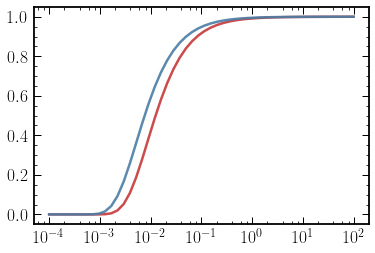

In [7]:
def J_bb(z):
    
    z_mu = 1.98e6
    
    return 0.983 * np.exp(-(z/z_mu)**2.5) * (1 - 0.0381 * (z/z_mu)**2.29)

# Surviving Probability
# From Chluba 2015 1506.06582
def survival_prob(x, z):
    
    xc_DC = 8.60e-3 * ((1.+z)/2e6)**0.5
    xc_BR = 1.23e-3 * ((1.+z)/2e6)**(-0.672)
    
    xc = np.sqrt(xc_DC**2 + xc_BR**2)
    
    return np.exp(-xc/x)


def lambda_func(x_prime, z_prime):
    
    return alpha_rho * (x_prime - (x_prime - x_0 * survival_prob(x_prime, z_prime)) * J_bb(z_prime))


# Temperature Shift
def T_shift(x):
    
    T_shift = np.where(x<=300, x*np.exp(x)/(np.exp(x) - 1), x)
    
    return T_shift


# [[[ Note! For definition of I0, G, M, we should include T0 for doing the variation ]]]

# Black Body Intensity
def I0(x, T0, units='eV_per_cmSq'):
    
    if   units == 'eV_per_cmSq': # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6
        
    I0 = np.where(x<=300, prefac * 2 * T0**3 / h**2 / c**2  * x**3 / (np.exp(x)-1), 0 )
        
    return I0


# rho_bar(x):
# Normalized and Dimless Intensity, Defined in Hook2023
def rho_bar(x):
    
    return (15/np.pi**4) * x**3/(np.exp(x)-1)


# G-function (Chluba 15)
def G(x, T0, units='eV_per_cmSq'):

    return I0(x, T0, units=units) * T_shift(x)


# M-function (Chluba 15)
def M(x, T0, units='eV_per_cmSq'):
    
    return G(x, T0, units=units) * (alpha_mu - 1./x)

# --------------------------------------------
# Plot Survival Probability (mu-era)

xi_ary = np.logspace(-4, 2)

plt.xscale('log')

plt.plot(xi_ary, survival_prob(xi_ary, 2e6))
plt.plot(xi_ary, survival_prob(xi_ary, 4e5))

ax = plt.gca()

locmaj = ticker.LogLocator(base=10,numticks=12)
ax.xaxis.set_major_locator(locmaj)

locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())

## 1E. Functions (Special, for y-era)

Compton y-parameter for photon distribution

\begin{equation}
y_\gamma = \int \frac{T_\gamma}{m_e} \frac{\sigma_T n_e}{H(z)(1+z)} dz.
\end{equation}


Compton y-parameter for electron distribution

\begin{equation}
y_e = \int \frac{T_e}{m_e} \frac{\sigma_T n_e}{H(z)(1+z)} dz.
\end{equation}

In the definition of $y_\gamma$ and $y_e$, we fix $T_0=2.7255\text{K}$. 


BR emissivity

\begin{equation}
\Lambda_\text{BR} = \frac{\alpha \lambda_e^3}{2 \pi \sqrt{6 \pi}} n_{\text{free} p} \theta_e^{-7/2} g_\text{ff}(x_e),
\end{equation}

where $\theta_e = T_e/m_e$, $x_e = \omega/T_e$, $n_{\text{free} p} = X_{e,\text{H}} n_\text{H}$. 

Photon survival probability

\begin{equation}
P_s(x,z) \simeq e^{-\tau_\text{ff}(x,z)},
\end{equation}
where 

\begin{equation}
\tau_\text{ff}(x,z) = \int^z_0 \frac{\Lambda_\text{BR}(z,x_e) ( 1 - e^{-x_e} )}{x_e^3} \frac{\sigma_T n_e c dz}{H(1+z)}
\end{equation}

In [8]:
# Y-function (Chluba 15)
def Y(x, T0, units='eV_per_cmSq'):
    
    Y = G(x, T0, units=units) * ( x/np.tanh(x/2)-4 )
    
    return Y

def f(x):
    
    return np.exp(-x) * ( 1 + x**2/2 )

# Compton-y parameter (Photon)
# Modified by Xucheng by replacing ``x_e(z_to_int) * ne0 * (1.0 + z_to_int) ** 3'' with ``n_e(z)''
def y_gamma(z):
    
    z_to_int = np.logspace(-5, np.log10(z), 500)
    
    fac_1 = TCMB_0 * (1.0 + z_to_int) / m_e

    fac_2 = thomson_xsec * n_e(z_to_int) * c / ( hubble(z_to_int) / hbar * (1.0 + z_to_int))

    return np.trapz(fac_1 * fac_2, z_to_int)


# T_e: Electron Temperature
# in eV   
def T_e(z):
    
    try:
        
        _ = iter(z)
        
        T_out = np.zeros_like(z)

        T_out[z  < 2999] = np.interp(z[z < 2999], np.flipud(x_e_data[0]) - 1.0, np.flipud(x_e_data[1]))
        T_out[z >= 2999] = (1.0 + z[z >= 2999]) * TCMB_0
    
    except:
        
        if z < 2999:
            
            T_out = np.interp(z, np.flipud(x_e_data[0]) - 1.0, np.flipud(x_e_data[1]))

        else:
            
            T_out = (1.0 + z) * TCMB_0

    return T_out


# Approx gff for high x (Draine)
def approx_high_x_Draine(x, T_e):
    
    theta_e = T_e / m_e
        
    return np.log(np.exp(1.0) + np.exp(5.960 - np.sqrt(3) / np.pi * np.log(270.783 * x * theta_e ** (-0.5))))


# Approx gff for low x (Draine)
def approx_low_x_Draine(x, T_e):
    
    theta_e = T_e / m_e
    
    return 4.691 * (1.0 - 0.118 * np.log(27.0783 * x * theta_e ** (-0.5)))


# Gaunt factor: g_ff    (Modifed by Xucheng)
# x    : 1D array N_x
# g_ff : 1D array N_x
def g_ff(x, T_e):  # here we define the Gaunt factor as in https://astrojacobli.github.io/astro-ph/ISM/Draine.pdf, sec.10.2
    
    # thr = 1e-3
    
    g_ff_out = approx_high_x_Draine(x, T_e)

    return g_ff_out


# Lambda_BR           (Modifed by Xucheng, Double-checked with Andrea's Code)
# x    : 1D array N_x
# XeH  : 1D array N_XeH

# [[[Warning: Xe is the ionization ratio, not the dimless frequency]]]
def Lambda_BR(x, XeH, z):
    
    theta_e = T_e(z) / m_e
    
    # Number density of free proton
    # 1D array N_XeH
    # n_p = ne0 * (1.0 + z) ** 3 * XeH  # in cm^-3
    n_free_p = n_H(z) * XeH  # in cm^-3

    # 2D array N_x * 1
    x_electron = x[:,None] * TCMB_0 * (1.0 + z) / T_e(z)

    # 2D array N_x * N_Xe
    Lambda_BR = alpha * lambda_e ** 3 / (2 * np.pi * np.sqrt(6 * np.pi)) * n_free_p * theta_e ** (-7.0 / 2.0) * g_ff(x_electron, T_e(z))
    
    return Lambda_BR


# tau_ff
# x    : 1D array N_x
# z    : Number
def tau_ff(x, z):
    
    N_z_to_int = 500
    
    # 1D array N_z_to_int:  small number to z
    z_to_int = np.logspace(-5, np.log10(z), N_z_to_int)
    
    # 2D array N_x * N_z_to_int
    # [:, None] make x to transfer from 1D array to N_x * 1 2D array
    x_electron = x[:,None] * TCMB_0 * (1.0 + z_to_int) / T_e(z_to_int)

    # 2D array N_x * N_z_to_int
    # <<< XG replace 'x_e' with 'XeH_interp' >>>
    Lambda = Lambda_BR(x, XeH_interp(z_to_int), z_to_int)

    # 2D array N_x * N_z_to_int
    fac_1 = Lambda * (1 - np.exp(-x_electron)) / x_electron ** 3

    # 1D array N_z_to_int
    # <<< XG replace 'x_e' with 'XeH_interp' >>>
    # <<< XG replace 'ne0 * (1.0 + z_to_int) ** 3' with 'n_e(z)' >>>
    fac_2 = thomson_xsec * n_e(z_to_int) * c / (hubble(z_to_int) / hbar * (1.0 + z_to_int))
    
    # 1D array N_x
    # ( Note that fac_1 * fac_2 is a 2D array N_x * N_z_to_int )
    tau_ff = np.trapz(fac_1 * fac_2, z_to_int)
    
    return tau_ff

# 2. Formalism of $\gamma \rightarrow A'$ Transition

# 3. Calc and interp: $z_\text{res}(m_{A'},x)$ and $P_{\gamma \rightarrow A'}(m_{A'},x)$

# 4. Green's Function: Pure $\mu$ and Pure $y$

## 4A. Green's Function ($\mu$-era)

Green's function for $\mu$-era

\begin{equation}
G^\text{Chluba}_\text{$\mu$-era}(x,x',z';\color{magenta}{T_0}) = G^\text{Chluba}_{\mu}(x,x',z';\color{magenta}{T_0}) + G^\text{Chluba}_{\mathcal{T}}(x,x',z';\color{magenta}{T_0}). 
\end{equation}

M-Term ($3/\kappa_c \simeq 1.4$)

\begin{equation}
G^\text{Chluba}_{\mu}(x,x',z';\color{magenta}{T_0}) = \frac{3 \alpha_\rho x'}{\kappa^c} \left( 1 - P_s(x',z') \frac{x_0}{x'} \right) \cdot J^*(z') \cdot M^\text{Chluba}(x;\color{magenta}{T_0})
\end{equation}

T-Term

\begin{equation}
G^\text{Chluba}_{ \mathcal{T} }(x,x',z';\color{magenta}{T_0}) = \frac{1}{4} \lambda(x',z') \cdot G^\text{Chluba}(x;\color{magenta}{T_0}),
\end{equation}

where 

\begin{equation}
\lambda(x',z') = \alpha_\rho x' \left[ 1 - \left( 1 - P_s(x',z') \frac{x_0}{x'} \right) J^*(z') \right]. 
\end{equation}

In [9]:
# Green's Function in mu-era: M-part
def greens_mu_M(x, x_prime, z_prime,  T0, units='eV_per_cmSq'):
    
    # 2D array  N_x * N_xp
    # Note that:
    # f(x)            : 1D array N_x
    # f(x)[:,None]    : 2D array N_x * N_xp
    greens_mu_ary = (   3 * alpha_rho / kappa_c
        * (x_prime - x_0 * survival_prob(x_prime, z_prime))
        * J_bb(z_prime) * M(x, T0, units = units)[:, None]   )
    
    return greens_mu_ary

# Green's Function in mu-era: T-part
def greens_mu_T(x, x_prime, z_prime,  T0, units='eV_per_cmSq'):
    
    # 2D array  N_x * N_xp
    # Note that:
    # f(x)            : 1D array N_x
    # f(x)[:,None]    : 2D array N_x * N_xp
    greens_mu_ary = ( lambda_func(x_prime, z_prime) * G(x, T0, units = units)[:, None] / 4. )
    
    return greens_mu_ary

# Green's Function in mu-era: M+T
def greens_mu_MT(x, x_prime, z_prime,  T0, units='eV_per_cmSq'):
    
    # 2D array  N_x * N_xp
    
    greens_mu_M_ary =  greens_mu_M(x, x_prime, z_prime, T0, units=units)
    
    greens_mu_T_ary =  greens_mu_T(x, x_prime, z_prime, T0, units=units)
    
    greens_mu_ary   =  greens_mu_M_ary + greens_mu_T_ary
    
    return greens_mu_ary

## 4B. Green's Function (y era)

### $G_y$: Green's function for y-era

\begin{equation}
\begin{aligned}
G_y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) = G_Y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) + G_\text{Doppler}^\text{Chluba}(x,x',z';\color{magenta}{T_0}),
\end{aligned}
\end{equation}

where

\begin{equation}
\boxed{ G_Y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) = \alpha_\rho x' \left(1 - \frac{e^{ 4 (\alpha+\beta) y_\gamma(z') } e^{-\tau_\text{ff}(x',z')} }{1+x' y_\gamma(z')}\right) \frac{Y^\text{Chluba}(x, \color{magenta}{T_0})}{4} }
\end{equation}

and

\begin{equation}
\boxed{ G_\text{Doppler}^\text{Chluba}(x,x',z';\color{magenta}{T_0}) = \alpha_\rho x' \frac{\rho_\gamma(\color{magenta}{T_0})}{4\pi} \frac{2\pi}{\color{magenta}{T_0}} \frac{ e^{-\frac{1}{4 \beta y_\gamma(z')} \left\{\ln\left[x \left(1/x' + y_\gamma(z') \right)\right] - \alpha y_\gamma(z') \right\}^2 }  }{ x' \sqrt{4 \pi \beta y_\gamma(z')}} e^{-\tau_\text{ff}(x',z')} }.
\end{equation}

Here, 

\begin{equation}
\rho_\gamma(T_0) = \frac{\pi^2}{15} T_0^4
\end{equation}

and

\begin{equation}
\alpha(x',z') = \frac{3 - 2 f(x')}{ \sqrt{1+x'y_\gamma(z')} }, \quad \quad \beta(x',z') = \frac{1}{1+x' y_\gamma(z') \left[ 1 - f(x') \right] }. 
\end{equation}

### $G_y$ in $y_\gamma \ll 1$ Limit

When $y_\gamma \ll 1$, we approximately have

\begin{equation}
\frac{ e^{-\frac{1}{4 \beta y_\gamma(z')} \left\{\ln\left[x \left(1/x' + y_\gamma(z') \right)\right] - \alpha y_\gamma(z') \right\}^2 }  }{ x' \sqrt{4 \pi \beta y_\gamma(z')}}  \simeq \frac{1}{x'} \delta \left(\ln\left(\frac{x}{x'}\right) \right) \simeq \delta(x-x').
\end{equation}

Using such an approximation, we can write the y-era Green's function as

\begin{equation}
\begin{aligned}
G_y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) = G_Y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) + G_\text{Doppler}^\text{Chluba}(x,x',z';\color{magenta}{T_0}),
\end{aligned}
\end{equation}

where 

\begin{equation}
\boxed{ G_Y^\text{Chluba}(x,x',z';\color{magenta}{T_0}) \simeq \alpha_\rho x' \left(1 - e^{-\tau_\text{ff}(x',z')}\right) \frac{Y^\text{Chluba}(x, \color{magenta}{T_0})}{4} },
\end{equation}

and 

\begin{equation}
\boxed{ G_\text{Doppler}^\text{Chluba}(x,x',z';\color{magenta}{T_0}) \simeq \alpha_\rho x' \frac{\rho_\gamma( \color{magenta}{T_0} )}{4\pi} \frac{2\pi}{ \color{magenta}{T_0} } \delta(x-x') e^{-\tau_\text{ff}(x',z')} }.
\end{equation}

In [10]:
# alpha function defined in Hook2023 and Chluba2015
def alpha_func(x_prime,z_prime):
    
    # Compton y-parameter (photon)
    y = y_gamma(z_prime)
    
    # alpha
    alpha_func = ( 3 - 2 * f(x_prime) )/np.sqrt(1+x_prime * y)
    
    return alpha_func


# beta function defined in Hook2023 and Chluba2015
def beta_func(x_prime,z_prime):
    
    # Compton y-parameter (photon)
    y = y_gamma(z_prime)
    
    # beta
    beta_func = 1/( 1 + x_prime * y * (1-f(x_prime)) )
    
    return beta_func


# Green's function: y-era (Y-part)
# x   : 1D array N_x
# xp  : 1D array N_xp
# T0  : Number  # in eV
def greens_Y(x,x_prime,z_prime,T0,units="eV_per_cmSq"):
    
    if   units == 'eV_per_cmSq': # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6    
    
    # Compton y-parameter (photon)
    y = y_gamma(z_prime)
    
    # <<<Use T0_vary>>> in 'rho_gamma(T0)'
    # photon energy density
    rho_gamma = (np.pi**2/15) * T0**4 /( hbar*c )**3  # in eV/cm^3
    
    # tau_ff
    # 1D array N_xp
    tau = tau_ff(x_prime, z_prime)
    
    # alpha
    alpha = (3-2 * f(x_prime))/np.sqrt(1+x_prime * y)
    
    # beta
    beta = 1/( 1 + x_prime * y * (1-f(x_prime)) )
    
    
    # <<<Use T0_vary>>> in 'Y(x_prime, T0, units=units)'
    # 2D array: N_x * N_xp
    # We use [:,None] to make Y(x) to be a 2D N_x * 1 array
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    term_Y = (1.0 - np.exp(y * (alpha + beta)) * np.exp(-tau) / (1.0 + x_prime * y)) * Y(x, T0, units="eV_per_cmSq")[:, None] / 4
    # in eV/cm^2
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    # Correct (Modified Chluba)
    # 2D array: N_x * N_xp
    green_Y = prefac * term_Y * x_prime * alpha_rho  
    
    return green_Y


# Green's function: y-era (Doppler-part)
# x   : 1D array N_x
# xp  : 1D array N_xp
# T0  : Number  # in eV
def greens_Doppler(x,x_prime,z_prime,T0,units="eV_per_cmSq"):
    
    if   units == 'eV_per_cmSq': # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6    
        
    # Compton y-parameter (photon)
    y = y_gamma(z_prime)
    
    # <<<Use T0_vary>>> in 'rho_gamma(T0)'
    # photon energy density
    rho_gamma = (np.pi**2/15) * T0**4 /( hbar*c )**3  # in eV/cm^3
    
    # tau_ff
    # 1D array N_xp
    tau = tau_ff(x_prime, z_prime)
    
    # alpha
    alpha = (3-2 * f(x_prime))/np.sqrt(1+x_prime * y)
    
    # beta
    beta = 1/( 1 + x_prime * y * (1-f(x_prime)) )    
 
    # 2D array: N_x * N_xp
    # We use [:,None] to make x to be a 2D N_x * 1 array
    gaussian = np.exp(-((np.log(x[:, None] / x_prime) - alpha * y + np.log(1 + x_prime * y)) ** 2) / (4 * y * beta)) / (x_prime * np.sqrt(4 * np.pi * y * beta))
    
    # <<<Use T0_vary>>> in '2pi/T0'
    # 2D array: N_x * N_xp
    term_Doppler = c * hbar * ( rho_gamma / (4*np.pi) )  * ( 2*np.pi/T0 ) * np.exp(-tau) * gaussian
    # in eV/cm^2

    # Correct (Modified Chluba)
    # 2D array: N_x * N_xp
    green_Doppler = prefac * term_Doppler * x_prime * alpha_rho
    
    return green_Doppler


# Green's function: y-era (Total)
# x   : 1D array N_x
# xp  : 1D array N_xp
# T0  : Number  # in eV
def greens_y(x,x_prime,z_prime,T0,units="eV_per_cmSq"):
    
    if   units == 'eV_per_cmSq': # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6

    # Compton y-parameter (photon)
    y = y_gamma(z_prime)
    
    # <<<Use T0_vary>>> in 'rho_gamma(T0)'
    # photon energy density
    rho_gamma = (np.pi**2/15) * T0**4 /( hbar*c )**3  # in eV/cm^3
    
    # tau_ff
    # 1D array N_xp
    tau = tau_ff(x_prime, z_prime)
    
    # alpha
    alpha = (3-2 * f(x_prime))/np.sqrt(1+x_prime * y)
    
    # beta
    beta = 1/( 1 + x_prime * y * (1-f(x_prime)) )
    
    # 2D array: N_x * N_xp
    # We use [:,None] to make x to be a 2D N_x * 1 array
    gaussian = np.exp(-((np.log(x[:, None] / x_prime) - alpha * y + np.log(1 + x_prime * y)) ** 2) / (4 * y * beta)) / (x_prime * np.sqrt(4 * np.pi * y * beta))

    # <<<Use T0_vary>>> in 'Y(x_prime, T0, units=units)'
    # 2D array: N_x * N_xp
    # We use [:,None] to make Y(x) to be a 2D N_x * 1 array
    term_Y = (1.0 - np.exp(y * (alpha + beta)) * np.exp(-tau) / (1.0 + x_prime * y)) * Y(x, T0, units="eV_per_cmSq")[:, None] / 4
    # in eV/cm^2
    
    # <<<Use T0_vary>>> in '2pi/T0'
    # 2D array: N_x * N_xp
    term_Doppler = c * hbar * ( rho_gamma / (4*np.pi) )  * ( 2*np.pi/T0 ) * np.exp(-tau) * gaussian
    # in eV/cm^2
    
    # Correct (Modified Chluba)
    # 2D array: N_x * N_xp
    # green_y = prefac * (term_Y) * x_prime * alpha_rho
    # green_y = prefac * (term_Doppler) * x_prime * alpha_rho
    green_y = prefac * (term_Y + term_Doppler) * x_prime * alpha_rho
    
    return green_y


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Test of the Code
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

x_test          = np.array([10])
x_prime_test    = np.array([0.1,1,10])
z_prime_test    = 10**5
# z_prime_test    = zres_interp(10**(-5),0)[0]
T0_test         = TCMB_0

ratio_test = (greens_Y(x_test,x_prime_test,z_prime_test,T0_test,units="eV_per_cmSq") + greens_Doppler(x_test,x_prime_test,z_prime_test,T0_test,units="eV_per_cmSq") )/greens_y(x_test,x_prime_test,z_prime_test,T0_test,units="eV_per_cmSq")

print('x                     = ', x_test[0])
print('x_prime               = ', x_prime_test[0])
print('z_prime               = ', z_prime_test)
print('T0                    = ', T0_test/K, 'K')
print('(G_Y+G_Doppler)/G_y   = ', ratio_test[0,0])

x                     =  10
x_prime               =  0.1
z_prime               =  100000
T0                    =  2.7255 K
(G_Y+G_Doppler)/G_y   =  1.0


In [11]:
x_prime_test = 15
z_prime_test = 6e4

y_gamma_test = y_gamma(z_prime_test)

alpha_test   = alpha_func(x_prime_test,z_prime_test)
beta_test    = beta_func(x_prime_test,z_prime_test)

survival_prob_mu_test = survival_prob(x_prime_test,z_prime_test)
survival_prob_y_test  = np.exp( - tau_ff(np.array([x_prime_test]), z_prime_test) )[0]

print( 'x_prime            = ', x_prime_test)
print( 'z_prime            = ', z_prime_test)
print( '')
print( 'y_gamma            = ', y_gamma_test)
print( '')
print( 'x_prime * y_gamma  = ', x_prime_test*y_gamma_test )
print( '')
print( 'survival prob (mu) = ', survival_prob_mu_test)
print( 'survival prob (y)  = ', survival_prob_y_test)
print( 'alpha              = ', alpha_test )
print( 'beta               = ', beta_test )
print( '')
print( '')
print( survival_prob_y_test * np.exp( (alpha_test + beta_test) * y_gamma_test )/(1+x_prime_test*y_gamma_test) )

x_prime            =  15
z_prime            =  60000.0

y_gamma            =  0.1652655417601046

x_prime * y_gamma  =  2.478983126401569

survival prob (mu) =  0.9991293662924291
survival prob (y)  =  0.9999999917042052
alpha              =  1.6083665821953461
beta               =  0.28744742480456903


0.39320376110472954


# 5. Green's Function: $\mu-y$ Transition Era

### Chluba15 Transition Function

\begin{equation}
\mathscr{T}_\mu(z) = 1 - \exp\left[ - \left(\frac{1+z}{5.8 \times 10^4}\right)^{1.88} \right]  \quad \text{and} \quad \mathscr{T}_y(z) = \frac{1}{1+\left(\frac{1+z}{6 \times 10^4}\right)^{2.58}}.
\end{equation}

The spectral distortion in $\mu-y$ transition era is
\begin{equation}
\Delta I(x; m_{A'}, \epsilon;  \color{magenta}{T_0}) = - \frac{1}{2 \zeta(3)} \int dx' G^{(Chluba)}(x,x',z_\text{res}; \color{magenta}{T_0}) \frac{x'^2}{e^{x'}-1} P_{\gamma \rightarrow A'}(x',z_\text{res}),
\end{equation}

where 

\begin{equation}
G^{(Chluba)}(x,x',z_\text{res};\color{magenta}{T_0}) = \mathscr{T}_\mu(z_\text{res}) \times G^{(Chluba)}_\mu(x,x',z_\text{res};\color{magenta}{T_0}) + \mathscr{T}_y(z_\text{res}) \times G^{(Chluba)}_y(x,x',z_\text{res};\color{magenta}{T_0}).
\end{equation}

Here, we have
\begin{equation}
G^{(Chluba)}_y(x,x',z_\text{res};\color{magenta}{T_0}) = G^{(Chluba)}_Y(x,x',z_\text{res};\color{magenta}{T_0}) + G^{(Chluba)}_\text{Doppler}(x,x',z_\text{res};\color{magenta}{T_0})
\end{equation}

## Other reasonable transition functions

These transition functions are found by Xucheng after comparing on the shape of Green's function with Chluba15.

### Exponential Transition Function (General)

\begin{equation}
\mathscr{T}_\mu(z) = 1 - \exp\left[ - \left(\frac{1+z}{1+z_\mathrm{trans}}\right)^{\mathrm{Power}} \right].
\end{equation}

### Transition Function (Chluba 2015):

\begin{equation}
z_\mathrm{trans} = 5.8 \times 10^4, \quad \mathrm{Power} = 1.88
\end{equation}

### Transition Function (Xucheng):

\begin{equation}
z_\mathrm{trans} = (5.8 \times 10^4, 10^5, 1.4 \times 10^5, 1.7 \times 10^5), \quad \mathrm{Power} = (1.88, 3, 5)
\end{equation}

### Best Value (Xucheng)

\begin{equation}
z_\mathrm{trans} = 1.7 \times 10^5, \quad \mathrm{Power} = (3,5)
\end{equation}

z_trans =  131000.0
r_trans =  5.29


<Figure size 432x288 with 0 Axes>

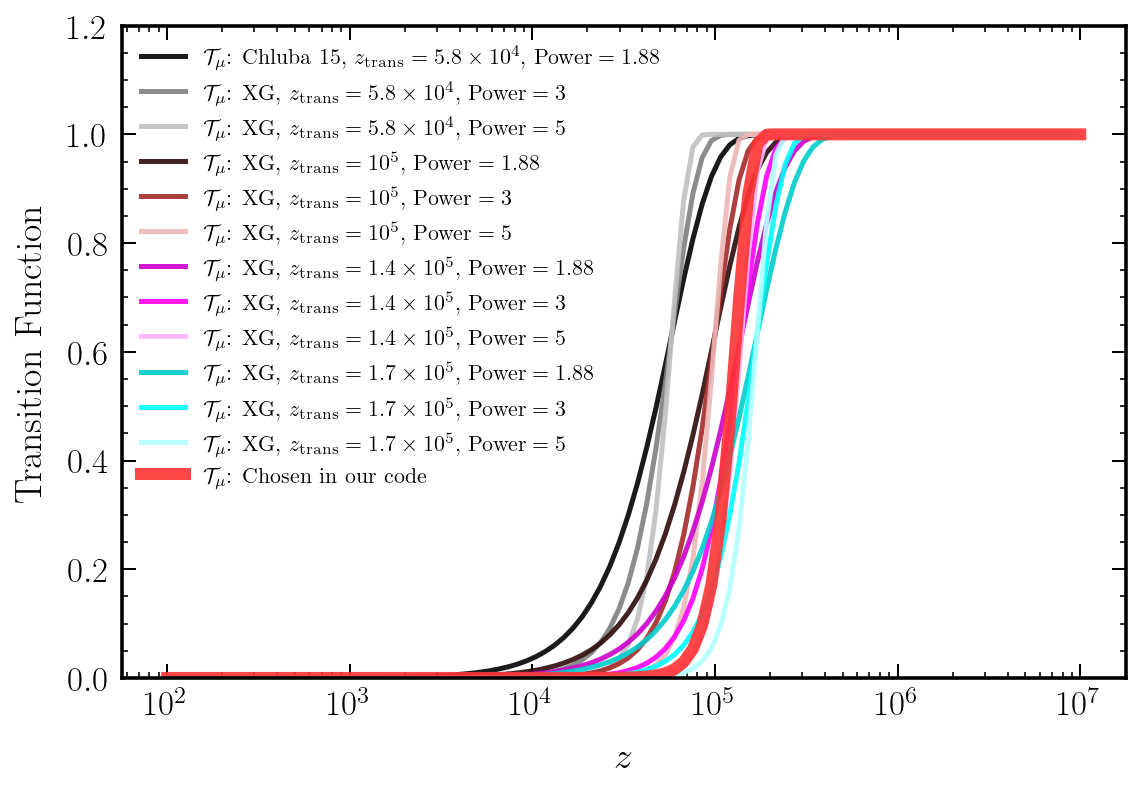

In [12]:
# Transition Function:
def Ttrans_mu_para(z,z_trans,Power_trans):
    
    Ttrans_mu = 1 - np.exp( -((1+z)/(1+z_trans))**Power_trans )
    
    return Ttrans_mu

z_trans_A     = 5.8 * 10**4
z_trans_B     = 10**5 
z_trans_C     = 1.4 * 10**5
z_trans_D     = 1.7 * 10**5
z_trans_E     = 1.9 * 10**5

Power_trans_A = 1.88
Power_trans_B = 3
Power_trans_C = 5

color_5p8e4_1p88 = lighten_color('gray', 2)
color_5p8e4_3    = lighten_color('gray', 1)
color_5p8e4_5    = lighten_color('gray', 0.5)

color_10e4_1p88  = lighten_color('brown', 1.5)
color_10e4_3     = lighten_color('brown', 1)
color_10e4_5     = lighten_color('brown', 0.3)

color_14e4_1p88  = lighten_color('magenta', 1.2)
color_14e4_3     = lighten_color('magenta', 1)
color_14e4_5     = lighten_color('magenta', 0.3)

color_17e4_1p88  = lighten_color('cyan', 1.2)
color_17e4_3     = lighten_color('cyan', 1)
color_17e4_5     = lighten_color('cyan', 0.3)

# z_trans_choose = 1.3*10**5
# r_trans_choose = 4

# z_trans_choose = 1.3*10**5
# r_trans_choose = 5

z_trans_choose = 1.31*10**5
r_trans_choose = 5.29

# z_trans_choose   = 1.03e+05
# r_trans_choose   = 2.52


# z_trans_choose = 1.23*10**5
# r_trans_choose = 10

print("z_trans = ", z_trans_choose)
print("r_trans = ", r_trans_choose)

def Ttrans_mu_Chluba15(z):
    
    z_trans     = z_trans_A
    Power_trans = Power_trans_A
    
    return Ttrans_mu_para(z,z_trans,Power_trans)

def Ttrans_mu(z):
    
    # Trans_mu = Ttrans_mu_para(z,1.3*10**5,6)
    Trans_mu = Ttrans_mu_para(z,z_trans_choose,r_trans_choose)
    
    return Trans_mu


# ========================================================
z_test = np.logspace(2,7,100)

Reg_test=10**(-5)

plt.figure()

set_matplotlib_formats('retina')
plt.figure(figsize=(9,6))

plt.xscale('log')
# plt.yscale('log')

plt.plot(z_test,  Ttrans_mu_Chluba15(z_test)                       , label = r'$\mathcal{T}_\mu$: Chluba 15, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 1.88$', color = color_5p8e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_A,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 3$',           color = color_5p8e4_3 )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_A,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 5$',           color = color_5p8e4_5 )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 1.88$',                   color = color_10e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 3$',                      color = color_10e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 5$',                      color = color_10e4_5     )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 1.88$',        color = color_14e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 3$',           color = color_14e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 5$',           color = color_14e4_5     )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 1.88$',        color = color_17e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 3$',           color = color_17e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 5$',           color = color_17e4_5     )

# plt.plot(z_test,  Ttrans_mu_XG_19e4_1p88(z_test) , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 1.88$', color = lighten_color('purple', 0.3))
# plt.plot(z_test,  Ttrans_mu_XG_19e4_3(z_test)    , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 3$', color = lighten_color('purple', 1) )
# plt.plot(z_test,  Ttrans_mu_XG_19e4_5(z_test)    , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 5$', color = lighten_color('purple', 1.2) )

plt.plot(z_test,  Ttrans_mu(z_test), label = r'$\mathcal{T}_\mu$: Chosen in our code', color = lighten_color('red', 0.8), linewidth=6)

# plt.title(r'$G_\mu(x,x^\prime,z^\prime)$ Normalization')

plt.xlabel(r'$z$')
plt.ylabel(r'Transition Function')

plt.ylim(0, 1.2)

plt.legend(fontsize=11)

plt.savefig('Trans_Func.pdf')

In [13]:
# Green's function: mu/y transition-era (Doppler-part)
# x   : 1D array N_x
# xp  : 1D array N_xp
# T0  : Number  # in eV
def greens_muy_trans(x,x_prime,z_prime,T0,units="eV_per_cmSq"):
    
    if  units == 'eV_per_cmSq':  # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6
    
    T_mu = Ttrans_mu(z_prime)
    
    greens_muy_trans = T_mu * greens_mu_MT(x,x_prime,z_prime,T0,units=units) + (1-T_mu) * greens_y(x,x_prime,z_prime,T0,units=units)

    return greens_muy_trans

# 6.A. Transition Era Compare

In [14]:
# Import the shapes from Chluba 2015
# ---------------------------------------------------------------------------------
# nu[GHz]-G[MJy/sr]
# ---------------------------------------------------------------------------------
# x=0.001
nu_G_Chluba_xp1em3_z6e4     = np.transpose( np.array( pd.read_csv('xp1em3_z6e4.csv') ) )
nu_G_Chluba_xp1em3_z7e4     = np.transpose( np.array( pd.read_csv('xp1em3_z7e4.csv') ) )
nu_G_Chluba_xp1em3_z8e4     = np.transpose( np.array( pd.read_csv('xp1em3_z8e4.csv') ) )
nu_G_Chluba_xp1em3_z9e4     = np.transpose( np.array( pd.read_csv('xp1em3_z9e4.csv') ) )
nu_G_Chluba_xp1em3_z1e5     = np.transpose( np.array( pd.read_csv('xp1em3_z1e5.csv') ) )
nu_G_Chluba_xp1em3_z1p5e5   = np.transpose( np.array( pd.read_csv('xp1em3_z1p5e5.csv') ) )
nu_G_Chluba_xp1em3_z2e5     = np.transpose( np.array( pd.read_csv('xp1em3_z2e5.csv') ) )
nu_G_Chluba_xp1em3_z3e5     = np.transpose( np.array( pd.read_csv('xp1em3_z3e5.csv') ) )

# x=0.01
nu_G_Chluba_xp1em2_z6e4     = np.transpose( np.array( pd.read_csv('xp1em2_z6e4.csv') ) )
nu_G_Chluba_xp1em2_z7e4     = np.transpose( np.array( pd.read_csv('xp1em2_z7e4.csv') ) )
nu_G_Chluba_xp1em2_z8e4     = np.transpose( np.array( pd.read_csv('xp1em2_z8e4.csv') ) )
nu_G_Chluba_xp1em2_z9e4     = np.transpose( np.array( pd.read_csv('xp1em2_z9e4.csv') ) )
nu_G_Chluba_xp1em2_z1e5     = np.transpose( np.array( pd.read_csv('xp1em2_z1e5.csv') ) )
nu_G_Chluba_xp1em2_z1p5e5   = np.transpose( np.array( pd.read_csv('xp1em2_z1p5e5.csv') ) )
nu_G_Chluba_xp1em2_z2e5     = np.transpose( np.array( pd.read_csv('xp1em2_z2e5.csv') ) )
nu_G_Chluba_xp1em2_z3e5     = np.transpose( np.array( pd.read_csv('xp1em2_z3e5.csv') ) )

# x=0.1
nu_G_Chluba_xp1em1_z6e4   = np.transpose( np.array( pd.read_csv('xp1em1_z6e4.csv') ) )
nu_G_Chluba_xp1em1_z7e4   = np.transpose( np.array( pd.read_csv('xp1em1_z7e4.csv') ) )
nu_G_Chluba_xp1em1_z8e4   = np.transpose( np.array( pd.read_csv('xp1em1_z8e4.csv') ) )
nu_G_Chluba_xp1em1_z9e4   = np.transpose( np.array( pd.read_csv('xp1em1_z9e4.csv') ) )
nu_G_Chluba_xp1em1_z1e5   = np.transpose( np.array( pd.read_csv('xp1em1_z1e5.csv') ) )
nu_G_Chluba_xp1em1_z1p5e5 = np.transpose( np.array( pd.read_csv('xp1em1_z1p5e5.csv') ) )
nu_G_Chluba_xp1em1_z2e5   = np.transpose( np.array( pd.read_csv('xp1em1_z2e5.csv') ) )
nu_G_Chluba_xp1em1_z3e5   = np.transpose( np.array( pd.read_csv('xp1em1_z3e5.csv') ) )

# x=1
nu_G_Chluba_xp1_z6e4      = np.transpose( np.array( pd.read_csv('xp1_z6e4.csv') ) )
nu_G_Chluba_xp1_z7e4      = np.transpose( np.array( pd.read_csv('xp1_z7e4.csv') ) )
nu_G_Chluba_xp1_z8e4      = np.transpose( np.array( pd.read_csv('xp1_z8e4.csv') ) )
nu_G_Chluba_xp1_z9e4      = np.transpose( np.array( pd.read_csv('xp1_z9e4.csv') ) )
nu_G_Chluba_xp1_z1e5      = np.transpose( np.array( pd.read_csv('xp1_z1e5.csv') ) )
nu_G_Chluba_xp1_z1p5e5    = np.transpose( np.array( pd.read_csv('xp1_z1p5e5.csv') ) )
nu_G_Chluba_xp1_z2e5      = np.transpose( np.array( pd.read_csv('xp1_z2e5.csv') ) )
nu_G_Chluba_xp1_z3e5      = np.transpose( np.array( pd.read_csv('xp1_z3e5.csv') ) )

# x=5
nu_G_Chluba_xp5_z6e4      = np.transpose( np.array( pd.read_csv('xp5_z6e4.csv'  ) ) )
nu_G_Chluba_xp5_z7e4      = np.transpose( np.array( pd.read_csv('xp5_z7e4.csv'  ) ) )
nu_G_Chluba_xp5_z8e4      = np.transpose( np.array( pd.read_csv('xp5_z8e4.csv'  ) ) )
nu_G_Chluba_xp5_z9e4      = np.transpose( np.array( pd.read_csv('xp5_z9e4.csv'  ) ) )
nu_G_Chluba_xp5_z1e5      = np.transpose( np.array( pd.read_csv('xp5_z1e5.csv'  ) ) )
nu_G_Chluba_xp5_z1p5e5    = np.transpose( np.array( pd.read_csv('xp5_z1p5e5.csv') ) )
nu_G_Chluba_xp5_z2e5      = np.transpose( np.array( pd.read_csv('xp5_z2e5.csv'  ) ) )
nu_G_Chluba_xp5_z3e5      = np.transpose( np.array( pd.read_csv('xp5_z3e5.csv'  ) ) )

# x=15
nu_G_Chluba_xp15_z6e4      = np.transpose( np.array( pd.read_csv('xp15_z6e4.csv') ) )
nu_G_Chluba_xp15_z7e4      = np.transpose( np.array( pd.read_csv('xp15_z7e4.csv') ) )
nu_G_Chluba_xp15_z8e4      = np.transpose( np.array( pd.read_csv('xp15_z8e4.csv') ) )
nu_G_Chluba_xp15_z9e4      = np.transpose( np.array( pd.read_csv('xp15_z9e4.csv') ) )
nu_G_Chluba_xp15_z1e5      = np.transpose( np.array( pd.read_csv('xp15_z1e5.csv') ) )
nu_G_Chluba_xp15_z1p5e5    = np.transpose( np.array( pd.read_csv('xp15_z1p5e5.csv') ) )
nu_G_Chluba_xp15_z2e5      = np.transpose( np.array( pd.read_csv('xp15_z2e5.csv') ) )
nu_G_Chluba_xp15_z3e5      = np.transpose( np.array( pd.read_csv('xp15_z3e5.csv') ) )


# ---------------------------------------------------------------------------------
# x-G[MJy/sr]
# ---------------------------------------------------------------------------------
# x=0.001
x_G_Chluba_xp1em3_z6e4   = np.vstack((nu_G_Chluba_xp1em3_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z6e4[1]))
x_G_Chluba_xp1em3_z7e4   = np.vstack((nu_G_Chluba_xp1em3_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z7e4[1]))
x_G_Chluba_xp1em3_z8e4   = np.vstack((nu_G_Chluba_xp1em3_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z8e4[1]))
x_G_Chluba_xp1em3_z9e4   = np.vstack((nu_G_Chluba_xp1em3_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z9e4[1]))
x_G_Chluba_xp1em3_z1e5   = np.vstack((nu_G_Chluba_xp1em3_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z1p5e5[1]))
x_G_Chluba_xp1em3_z1p5e5 = np.vstack((nu_G_Chluba_xp1em3_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z1p5e5[1]))
x_G_Chluba_xp1em3_z2e5   = np.vstack((nu_G_Chluba_xp1em3_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z2e5[1]))
x_G_Chluba_xp1em3_z3e5   = np.vstack((nu_G_Chluba_xp1em3_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z3e5[1]))

# x=0.01
x_G_Chluba_xp1em2_z6e4    = np.vstack((nu_G_Chluba_xp1em2_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z6e4[1]))
x_G_Chluba_xp1em2_z7e4    = np.vstack((nu_G_Chluba_xp1em2_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z7e4[1]))
x_G_Chluba_xp1em2_z8e4    = np.vstack((nu_G_Chluba_xp1em2_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z8e4[1]))
x_G_Chluba_xp1em2_z9e4    = np.vstack((nu_G_Chluba_xp1em2_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z9e4[1]))
x_G_Chluba_xp1em2_z1e5    = np.vstack((nu_G_Chluba_xp1em2_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z1e5[1]))
x_G_Chluba_xp1em2_z1p5e5  = np.vstack((nu_G_Chluba_xp1em2_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z1p5e5[1]))
x_G_Chluba_xp1em2_z2e5    = np.vstack((nu_G_Chluba_xp1em2_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z2e5[1]))
x_G_Chluba_xp1em2_z3e5    = np.vstack((nu_G_Chluba_xp1em2_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z3e5[1]))

# x=0.1
x_G_Chluba_xp1em1_z6e4    = np.vstack((nu_G_Chluba_xp1em1_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z6e4[1]))
x_G_Chluba_xp1em1_z7e4    = np.vstack((nu_G_Chluba_xp1em1_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z7e4[1]))
x_G_Chluba_xp1em1_z8e4    = np.vstack((nu_G_Chluba_xp1em1_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z8e4[1]))
x_G_Chluba_xp1em1_z9e4    = np.vstack((nu_G_Chluba_xp1em1_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z9e4[1]))
x_G_Chluba_xp1em1_z1e5    = np.vstack((nu_G_Chluba_xp1em1_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z1e5[1]))
x_G_Chluba_xp1em1_z1p5e5  = np.vstack((nu_G_Chluba_xp1em1_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z1p5e5[1]))
x_G_Chluba_xp1em1_z2e5    = np.vstack((nu_G_Chluba_xp1em1_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z2e5[1]))
x_G_Chluba_xp1em1_z3e5    = np.vstack((nu_G_Chluba_xp1em1_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z3e5[1]))

# x=1
x_G_Chluba_xp1_z6e4       = np.vstack((nu_G_Chluba_xp1_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z6e4[1]))
x_G_Chluba_xp1_z7e4       = np.vstack((nu_G_Chluba_xp1_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z7e4[1]))
x_G_Chluba_xp1_z8e4       = np.vstack((nu_G_Chluba_xp1_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z8e4[1]))
x_G_Chluba_xp1_z9e4       = np.vstack((nu_G_Chluba_xp1_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z9e4[1]))
x_G_Chluba_xp1_z1e5       = np.vstack((nu_G_Chluba_xp1_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z1e5[1]))
x_G_Chluba_xp1_z1p5e5     = np.vstack((nu_G_Chluba_xp1_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z1p5e5[1]))
x_G_Chluba_xp1_z2e5       = np.vstack((nu_G_Chluba_xp1_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z2e5[1]))
x_G_Chluba_xp1_z3e5       = np.vstack((nu_G_Chluba_xp1_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z3e5[1]))

# x=5
x_G_Chluba_xp5_z6e4       = np.vstack((nu_G_Chluba_xp5_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z6e4[1]))
x_G_Chluba_xp5_z7e4       = np.vstack((nu_G_Chluba_xp5_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z7e4[1]))
x_G_Chluba_xp5_z8e4       = np.vstack((nu_G_Chluba_xp5_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z8e4[1]))
x_G_Chluba_xp5_z9e4       = np.vstack((nu_G_Chluba_xp5_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z9e4[1]))
x_G_Chluba_xp5_z1e5       = np.vstack((nu_G_Chluba_xp5_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z1e5[1]))
x_G_Chluba_xp5_z1p5e5     = np.vstack((nu_G_Chluba_xp5_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z1p5e5[1]))
x_G_Chluba_xp5_z2e5       = np.vstack((nu_G_Chluba_xp5_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z2e5[1]))
x_G_Chluba_xp5_z3e5       = np.vstack((nu_G_Chluba_xp5_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z3e5[1]))

# x=15
x_G_Chluba_xp15_z6e4      = np.vstack((nu_G_Chluba_xp15_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z6e4[1]))
x_G_Chluba_xp15_z7e4      = np.vstack((nu_G_Chluba_xp15_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z7e4[1]))
x_G_Chluba_xp15_z8e4      = np.vstack((nu_G_Chluba_xp15_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z8e4[1]))
x_G_Chluba_xp15_z9e4      = np.vstack((nu_G_Chluba_xp15_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z9e4[1]))
x_G_Chluba_xp15_z1e5      = np.vstack((nu_G_Chluba_xp15_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z1e5[1]))
x_G_Chluba_xp15_z1p5e5    = np.vstack((nu_G_Chluba_xp15_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z1p5e5[1]))
x_G_Chluba_xp15_z2e5      = np.vstack((nu_G_Chluba_xp15_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z2e5[1]))
x_G_Chluba_xp15_z3e5      = np.vstack((nu_G_Chluba_xp15_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z3e5[1]))

### Transition Era: $x=1$

x_prime    =  1
z_prime_1  =  300000
z_prime_2A =  200000
z_prime_3  =  60000
----------------------------
Transition Era:  10000 < z < 300000
----------------------------
z_trans =  131000.0
r_trans =  5.29


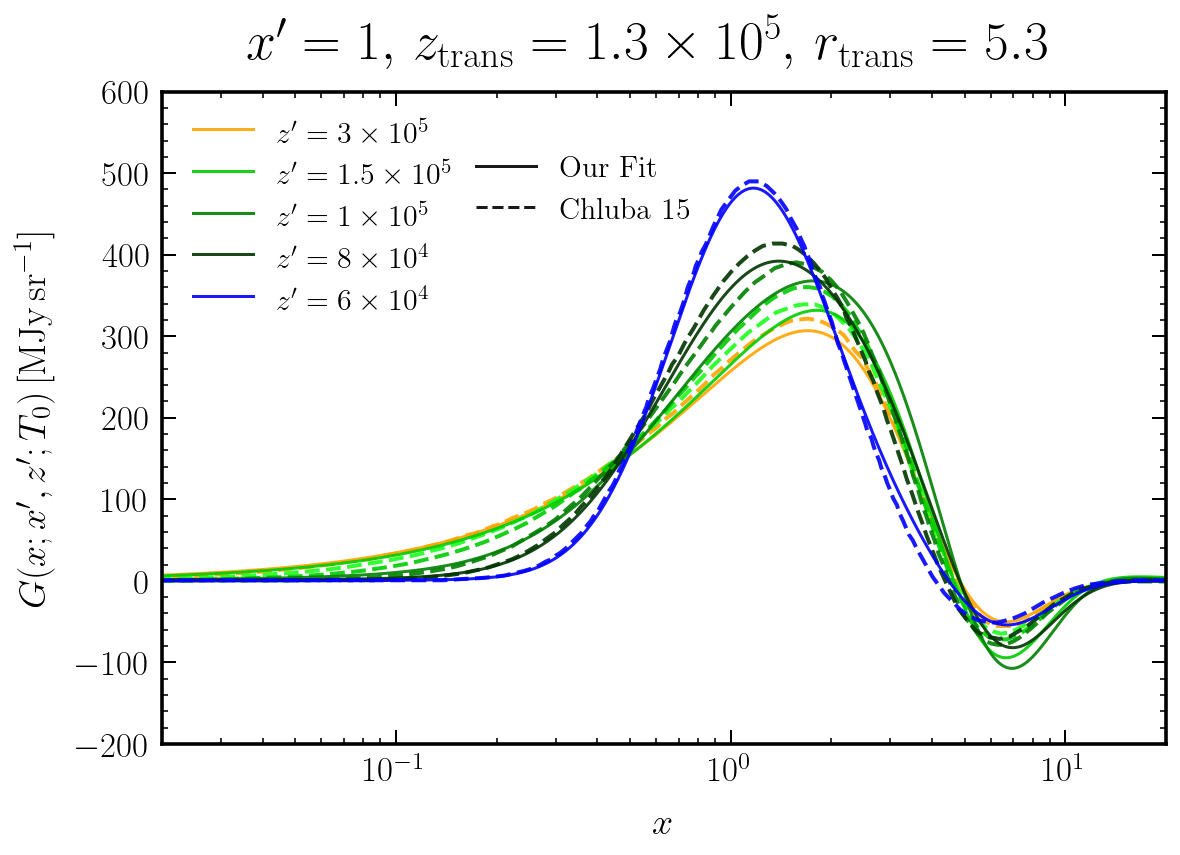

In [15]:
z_prime_test_1   = 3*10**5
z_prime_test_2A  = 2*10**5
z_prime_test_2B  = 1.5*10**5
z_prime_test_2C  = 1*10**5
z_prime_test_2D  = 8*10**4
z_prime_test_3   = 6*10**4

nu_ary_test = np.logspace(np.log10(1),np.log10(2000),1000)  # GHz
x_ary_test  = nu_ary_test * (2*np.pi) * (10**9 * sInv_to_eV)/TCMB_0

x_prime_ary_test = np.array([1])

G_ary_test_1   = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_1,TCMB_0,units="MJy") )
G_ary_test_2A  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2A,TCMB_0,units="MJy") )
G_ary_test_2B  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2B,TCMB_0,units="MJy") )
G_ary_test_2C  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2C,TCMB_0,units="MJy") )
G_ary_test_2D  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2D,TCMB_0,units="MJy") )
G_ary_test_3   = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_3,TCMB_0,units="MJy") )

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

fig.set_size_inches(9, 6)

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================

color_1   = lighten_color(color_mu,1)
color_2A  = lighten_color(color_trans,0.6)
color_2B  = lighten_color(color_trans,0.8)
color_2C  = lighten_color(color_trans,1)
color_2D  = lighten_color(color_trans,1.2)
color_3   = lighten_color(color_y,1)

solidwidth  = 1.5
dashedwidth = 2

G_1_Plt,        = ax.plot(    x_ary_test,   G_ary_test_1[0]  , color=color_1 , label=r'$z^\prime = 3 \times 10^5$', linewidth= solidwidth  )
G_1_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z3e5[0],   x_G_Chluba_xp1_z3e5[1]  , color=color_1 ,  linestyle='dashed', label=r'$z^\prime = 3 \times 10^5$ (Chluba 15)', linewidth= dashedwidth  )

#G_2A_Plt,        = ax.plot(    x_ary_test,   G_ary_test_2A[0]  , color=color_2A , label=r'$z^\prime = 2 \times 10^5$', linewidth= solidwidth  )
G_2A_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z2e5[0],   x_G_Chluba_xp1_z2e5[1]  , color=color_2A ,  linestyle='dashed', label=r'$z^\prime = 2 \times 10^5$ (Chluba 15)', linewidth= dashedwidth  )

G_2B_Plt,        = ax.plot(    x_ary_test,   G_ary_test_2B[0]  , color=color_2B , label=r'$z^\prime = 1.5 \times 10^5$', linewidth= solidwidth  )
G_2B_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z1p5e5[0],   x_G_Chluba_xp1_z1p5e5[1]  , color=color_2B ,  linestyle='dashed', label=r'$z^\prime = 1.5 \times 10^5$ (Chluba 15)', linewidth= dashedwidth  )

G_2C_Plt,        = ax.plot(    x_ary_test,   G_ary_test_2C[0]  , color=color_2C , label=r'$z^\prime = 1 \times 10^5$', linewidth= solidwidth  )
G_2C_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z1e5[0],   x_G_Chluba_xp1_z1e5[1]  , color=color_2C ,  linestyle='dashed', label=r'$z^\prime = 1 \times 10^5$ (Chluba 15)', linewidth= dashedwidth  )

G_2D_Plt,        = ax.plot(    x_ary_test,   G_ary_test_2D[0]  , color=color_2D , label=r'$z^\prime = 8 \times 10^4$', linewidth= solidwidth  )
G_2D_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z8e4[0],   x_G_Chluba_xp1_z8e4[1]  , color=color_2D ,  linestyle='dashed', label=r'$z^\prime = 8 \times 10^4$ (Chluba 15)', linewidth= dashedwidth  )

G_3_Plt,        = ax.plot(    x_ary_test,   G_ary_test_3[0]  , color=color_3 , label=r'$z^\prime = 6 \times 10^4$', linewidth= solidwidth  )
G_3_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1_z6e4[0],   x_G_Chluba_xp1_z6e4[1]  , color=color_3 ,  linestyle='dashed', label=r'$z^\prime = 6 \times 10^4$ (Chluba 15)', linewidth= dashedwidth  )

G_Fake_Plt_Ours,          = ax.plot(    x_ary_test,   1e10*np.ones(len(x_ary_test))  , color='black' , label=r'Our Fit', linewidth= solidwidth  )
G_Fake_Plt_Chluba,        = ax.plot(    x_ary_test,   1e10*np.ones(len(x_ary_test))  , color='black' , label=r'Chluba 15',  linestyle='dashed', linewidth= solidwidth  )


# ax.text(100, 400, r'$x^\prime = 0.1$', fontsize=18, color='black', rotation=0)

ax.set_xscale('log')

plt.xlabel(r'$x$')
plt.ylabel(r'$G(x;x^\prime,z^\prime;T_0)\,[\mathrm{MJy}\,\mathrm{sr}^{-1}]$')

# legend1 = plt.legend(handles=[G_1_Plt, G_2A_Plt, G_2B_Plt, G_2C_Plt, G_2D_Plt, G_3_Plt],                      bbox_to_anchor=(0.12 ,0.8), fontsize=10, loc= 'center' )
# legend2 = plt.legend(handles=[G_1_Plt_Chluba, G_2A_Plt_Chluba, G_2B_Plt_Chluba, G_2C_Plt_Chluba,  G_2D_Plt_Chluba, G_3_Plt_Chluba], bbox_to_anchor=(0.37,0.8), fontsize=10, loc= 'center' )

legend1 = plt.legend(handles=[G_1_Plt, G_2B_Plt, G_2C_Plt, G_2D_Plt, G_3_Plt],                      bbox_to_anchor=(0.16 ,0.81), fontsize=15, loc= 'center' )
# legend2 = plt.legend(handles=[G_1_Plt_Chluba, G_2B_Plt_Chluba, G_2C_Plt_Chluba,  G_2D_Plt_Chluba, G_3_Plt_Chluba], bbox_to_anchor=(0.37,0.8), fontsize=10, loc= 'center' )
legend_3 = plt.legend(handles=[G_Fake_Plt_Ours, G_Fake_Plt_Chluba], bbox_to_anchor=(0.42,0.85), fontsize=15, loc= 'center' )


plt.suptitle(r"$x^\prime = 1, \, z_\mathrm{trans} = 1.3 \times 10^5, \, r_\mathrm{trans}=5.3$", y=0.97, fontsize=27)

# plt.xlim(x_ary_test[0], x_ary_test[-1])
plt.xlim(0.02, 20)
# plt.ylim(-200, 500)
plt.ylim(-200, 600)

print('x_prime    = ', x_prime_ary_test[0])

print('z_prime_1  = ', z_prime_test_1)
print('z_prime_2A = ' , z_prime_test_2A)
print('z_prime_3  = ', z_prime_test_3)

print('----------------------------')
print('Transition Era: ', z_trans_1, '< z <', z_trans_2)
print('----------------------------')

print('z_trans = ', z_trans_choose)
print('r_trans = ', r_trans_choose)

plt.gca().add_artist(legend1)
# plt.gca().add_artist(legend2)

plt.savefig('GreenShape_plt_xp1.pdf')
plt.savefig('GreenShape_plt_xp1.png', dpi=350)

In [16]:
# xp = 1

# z = 6*10^4
x_G_Chluba_Func_xp1_z6e4   = interp1d(x_G_Chluba_xp1_z6e4[0], x_G_Chluba_xp1_z6e4[1], fill_value="extrapolate")

# z = 7*10^4
x_G_Chluba_Func_xp1_z7e4   = interp1d(x_G_Chluba_xp1_z7e4[0], x_G_Chluba_xp1_z7e4[1], fill_value="extrapolate")

# z = 8*10^4
x_G_Chluba_Func_xp1_z8e4   = interp1d(x_G_Chluba_xp1_z8e4[0], x_G_Chluba_xp1_z8e4[1], fill_value="extrapolate")

# z = 9*10^4
x_G_Chluba_Func_xp1_z9e4   = interp1d(x_G_Chluba_xp1_z9e4[0], x_G_Chluba_xp1_z9e4[1], fill_value="extrapolate")

# z = 10^5
x_G_Chluba_Func_xp1_z1e5   = interp1d(x_G_Chluba_xp1_z1e5[0], x_G_Chluba_xp1_z1e5[1], fill_value="extrapolate")

# z = 1.5*10^5
x_G_Chluba_Func_xp1_z1p5e5 = interp1d(x_G_Chluba_xp1_z1p5e5[0], x_G_Chluba_xp1_z1p5e5[1], fill_value="extrapolate")

# z = 2*10^5
x_G_Chluba_Func_xp1_z2e5   = interp1d(x_G_Chluba_xp1_z2e5[0], x_G_Chluba_xp1_z2e5[1], fill_value="extrapolate")

# z = 3*10^5
x_G_Chluba_Func_xp1_z3e5   = interp1d(x_G_Chluba_xp1_z3e5[0], x_G_Chluba_xp1_z3e5[1], fill_value="extrapolate")


# z = 6*10^4
def Error_xp1_z6e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 6e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z6e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 7*10^4
def Error_xp1_z7e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 7e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z7e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 8*10^4
def Error_xp1_z8e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 8e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z8e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 9*10^4
def Error_xp1_z9e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 9e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z9e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 1*10^5
def Error_xp1_z1e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 1e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z1e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 1.5*10^5
def Error_xp1_z1p5e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 1.5e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z1p5e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 2*10^5
def Error_xp1_z2e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 2e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z2e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 3*10^5
def Error_xp1_z3e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [1] )
    z_choose = 3e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]

    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1_z3e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# Total Error 
def Error_xp1_Tot(z_trans, r_trans, N, x_min, x_max, Power):
    
    Error_Calc = (
                   Error_xp1_z6e4(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z7e4(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z8e4(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z9e4(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z1e5(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z1p5e5( z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z2e5(   z_trans, r_trans, N, x_min, x_max  , Power)
                 + Error_xp1_z3e5(   z_trans, r_trans, N, x_min, x_max  , Power) 
                 )
    
    return Error_Calc


z_trans_test = 1.3e5
r_trans_test = 5

N_test       = 100
x_min_test   = 1e-1
x_max_test   = 1e1

Power_test   = -1


print('z_trans = ', z_trans_test )
print('r_trans = ', r_trans_test )
print('Power   = ', Power_test )

print('Error = ', Error_xp1_Tot(z_trans_test, r_trans_test, N_test, x_min_test, x_max_test, Power_test) )
print('-----------------------------------------------------------------------------')

# -----------------------------------------------------------------------------------
from   scipy.optimize import fmin

def Error_func(z_r_trans):
    
    return Error_xp1_Tot(z_r_trans[0], z_r_trans[1], N_test, x_min_test, x_max_test, Power_test)


fmin(Error_func, x0 = (1e5,3))

z_trans =  130000.0
r_trans =  5
Power   =  -1
Error =  12316.496846123726
-----------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 12298.547681
         Iterations: 65
         Function evaluations: 132


array([1.30733475e+05, 5.28802343e+00])